In [ ]:
!pip install torch_dreams

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from torch_dreams import Dreamer
import torchvision.models as models
plt.rcParams['figure.figsize'] = 5,5

In [ ]:
from torch_dreams import Dreamer
model = models.inception_v3(pretrained=True)
dreamy_boi = Dreamer(model, device='cpu', quiet=False)

Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth
100%|██████████| 104M/104M [00:01<00:00, 61.9MB/s] 


100%|██████████| 120/120 [00:43<00:00,  2.79it/s]


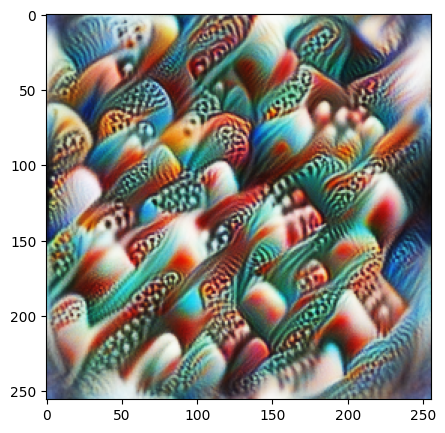

In [ ]:
image_param = dreamy_boi.render(
    layers = [model.Mixed_5b],
)
plt.imshow(image_param)
plt.show()

100%|██████████| 100/100 [01:00<00:00,  1.66it/s]


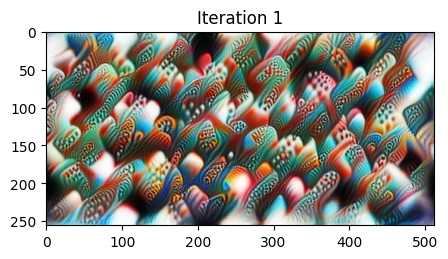

100%|██████████| 100/100 [00:58<00:00,  1.70it/s]


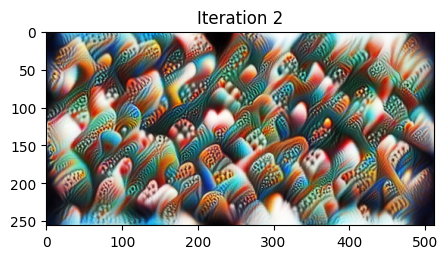

100%|██████████| 100/100 [00:59<00:00,  1.68it/s]


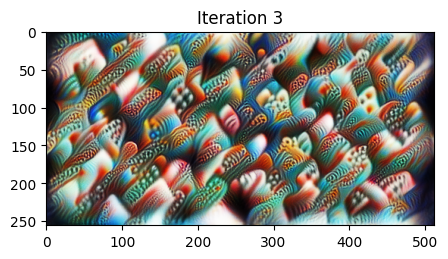

100%|██████████| 100/100 [00:53<00:00,  1.87it/s]


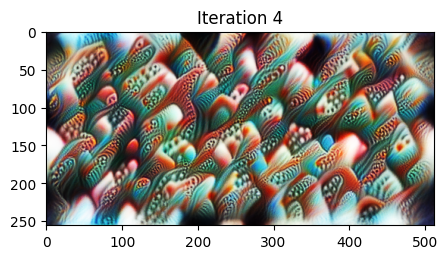

100%|██████████| 100/100 [01:03<00:00,  1.58it/s]


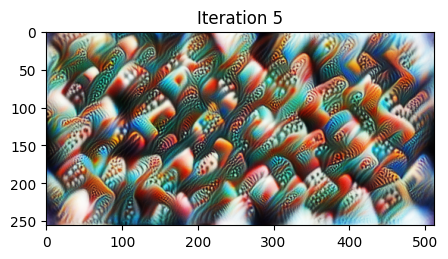

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

num_iterations = 5

for i in range(num_iterations):
    image_param = dreamy_boi.render(
        layers=[model.Mixed_5b],
        width=512,
        height=256,
        iters=100,
        lr=9e-3,
        rotate_degrees=15,
        scale_max=1.2,
        scale_min=0.5,
        translate_x=100,
        translate_y=100,
        custom_func=None,
        weight_decay=1e-2,
        grad_clip=1,
    )

    plt.imshow(image_param)
    plt.title(f"Iteration {i+1}")
    plt.show()


In [ ]:
layers_to_use = [model.Mixed_6b.branch1x1.conv]
def make_custom_func(layer_number = 0, channel_number= 0):
    def custom_func(layer_outputs):
        loss = layer_outputs[layer_number][:, channel_number].mean()
        return -loss
    return custom_func

In [ ]:
my_custom_func = make_custom_func(layer_number= 0, channel_number = 119)

100%|██████████| 200/200 [01:25<00:00,  2.34it/s]


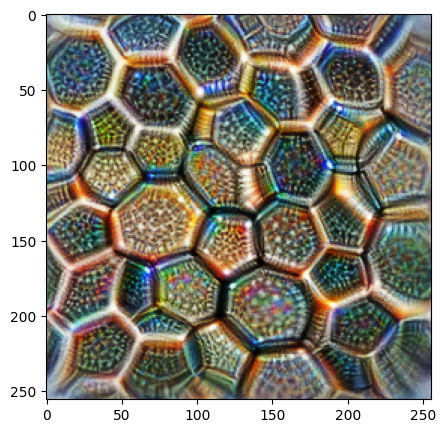

In [ ]:
image_param = dreamy_boi.render(
    layers = layers_to_use,
    custom_func = my_custom_func,
    iters = 200
)
plt.imshow(image_param)
plt.show()

In [ ]:
!wget -O flowers.jpg "https://kidlingoo.com/wp-content/uploads/flowers_name_in_english-980x510.jpg"

--2024-05-23 06:58:48--  https://kidlingoo.com/wp-content/uploads/flowers_name_in_english-980x510.jpg
Resolving kidlingoo.com (kidlingoo.com)... 65.181.111.249
Connecting to kidlingoo.com (kidlingoo.com)|65.181.111.249|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53873 (53K) [image/jpeg]
Saving to: ‘flowers.jpg’

flowers.jpg         100%[===================>]  52.61K  --.-KB/s    in 0.08s   

2024-05-23 06:58:49 (642 KB/s) - ‘flowers.jpg’ saved [53873/53873]



In [ ]:
from torch_dreams.custom_image_param import CustomImageParam

In [ ]:
my_custom_func = make_custom_func(layer_number = 0, channel_number = 19)
layers_to_use = [model.Mixed_6b.branch1x1.conv]

100%|██████████| 20/20 [01:02<00:00,  3.13s/it]


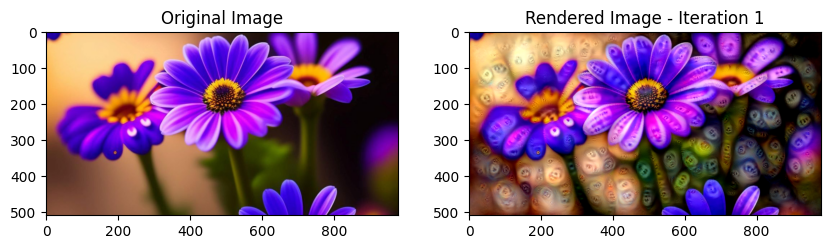

100%|██████████| 20/20 [00:58<00:00,  2.93s/it]


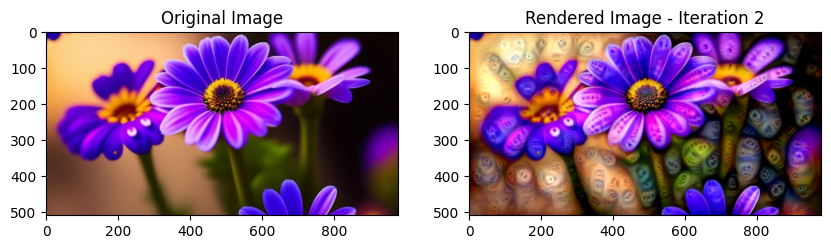

100%|██████████| 20/20 [01:03<00:00,  3.20s/it]


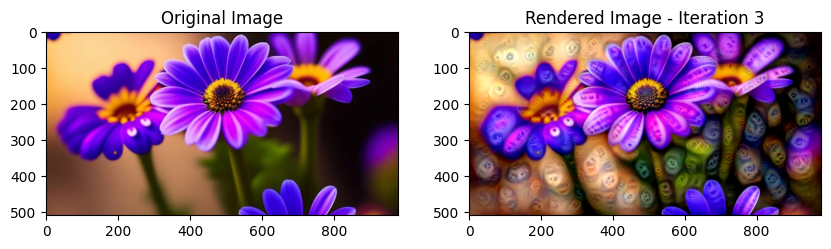

100%|██████████| 20/20 [00:58<00:00,  2.93s/it]


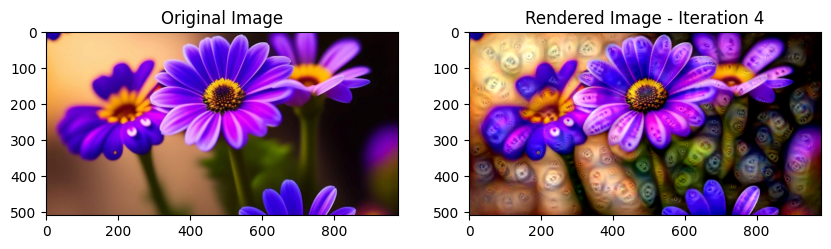

100%|██████████| 20/20 [01:07<00:00,  3.37s/it]


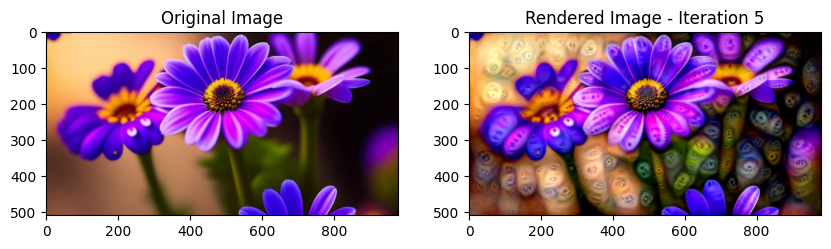

In [ ]:
import matplotlib.pyplot as plt
import cv2
from torch_dreams.custom_image_param import CustomImageParam
original_image = cv2.cvtColor(cv2.imread('flowers.jpg'), cv2.COLOR_BGR2RGB)
n = 5
for i in range(n):
    image_param = dreamy_boi.render(
        image_parameter=param,
        layers=layers_to_use,
        lr=2e-4,
        iters=20,
        custom_func=my_custom_func
    )
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    ax[0].imshow(original_image)
    ax[0].set_title("Original Image")
    ax[1].imshow(image_param)
    ax[1].set_title(f"Rendered Image - Iteration {i+1}")
    plt.show()
